### **Exercise1:**

Plot a rainbow

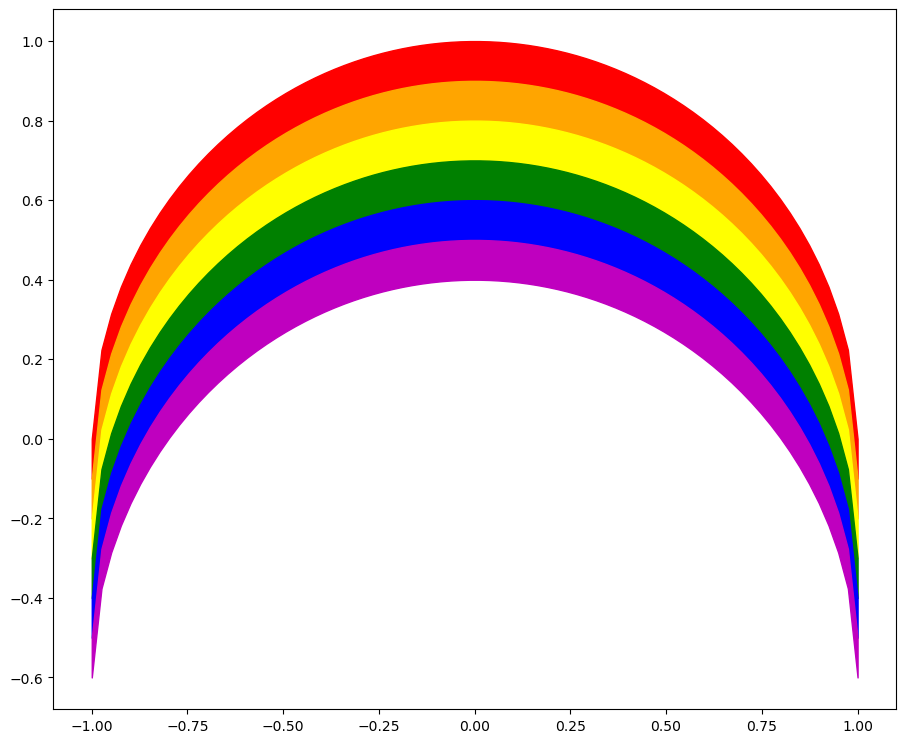

In [112]:
from matplotlib import pyplot as plt
import numpy as np

#x = np.linspace (0, 3.14, 50)
x = np.linspace (-1, 1, 80)
y1 = np.sqrt(1-x**2)
y2 = np.sqrt(1-x**2)-0.1
y3 = np.sqrt(1-x**2)-0.2
y4 = np.sqrt(1-x**2)-0.3
y5 = np.sqrt(1-x**2)-0.4
y6 = np.sqrt(1-x**2)-0.5
y7 = np.sqrt(1-x**2)-0.6

fig = plt.figure(figsize=(50,20))
ax1 = plt.subplot(grid[0,0])

ax1.fill_between(x,y1,y2,color='red')
ax1.fill_between(x,y2,y3,color='orange')
ax1.fill_between(x,y3,y4,color='yellow')
ax1.fill_between(x,y4,y5,color='green')
ax1.fill_between(x,y5,y6,color='blue')
ax1.fill_between(x,y6,y7,color='m')


### **Exercise2:**

Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

[0, 1, 3, 6, 2, 7, 13, 20, 12, 21, 11, 22, 10, 23, 9, 24, 8, 25, 43, 62, 42, 63, 41, 18, 42, 17, 43, 16, 44, 15, 45, 14, 46, 79, 113, 78, 114, 77, 39, 78, 38, 79, 37, 80, 36, 81, 35, 82, 34, 83]


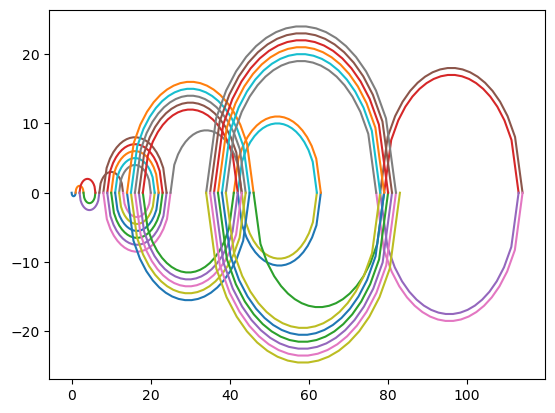

In [171]:
def racaman(n):
    l = list()
    for i in range(n):
        if i == 0:
            l.append(0)
        else:                     
            if l[i-1]-i > 0 :
                if l[i-1]-i not in l:
                    l.append(l[i-1]-i)
                else:
                    l.append(l[i-1]+i)                
            else:
                l.append(l[i-1]+i)
    return l
r = racaman(50)
print(r)
#fig = plt.figure(figsize=(5,5))
for i in range(len(r)):
   # print('i ', r[i])
    if i > 0:
        a1=r[i]
        a0=r[i-1]
        x1 = np.linspace(a0,a1,20)
        if i%2==0:
            y1 = np.sqrt(abs(((a1-a0)/2)**2-((x1-(a1+a0)/2)**2)))
        else:
            y1 = - np.sqrt(abs(((a1-a0)/2)**2-((x1-(a1+a0)/2)**2)))
        plt.plot(x1,y1)


### **Exercise3:**

Write a matrix multiplication fucntion using lists ("manually", like you did in c++) and another one using numpy arrays (call matmul function). Time them both. 

In [51]:
import numpy as np
n=3

A = np.arange(9).reshape(n,n)
#print(A)
B = A+2
#print(B)



In [52]:
%%timeit
np.matmul(A, B)

1.39 µs ± 163 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [53]:
%%timeit
c = 0
lC = list()

for k in range (n):
    #lC1 = [[0]*n]
    lC1 = list()

    for i in range(n):
        c = 0        
        for j in range (n):        
            c = c+ lA[k][j] * lB[j][i]             
        lC1.append(c)

    lC.append(lC1)
    #lC[k] = lC1
#print(lC)    

10.9 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### **Exercise4:**

Read the "extra exercise from c++" about the Jacobi method to solve the Laplace equation. Implement the solver (without defining a class and just using numpy aray as a mesh) for the equation with the same boundary conditions. Try to get the same final picture and gif as the c++ version. Hint: you can plot a matrix with plt.imshow(MATRIX_TO_PLOT). The gif creation example scipt is in the file `anym.py` (not in the Jupyterlab as it has troubles displaying and sometimes even producing gifs, rememeber that you can export your notebooks into `.py` files by `Files->Export Notebook as... -> Export Notebook as executable script`)

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [ 12.5          9.08725968   6.25848149   4.12567096   2.63110078
    1.6326595    0.96592335   0.47145111   0.        ]
 [ 25.          18.48717894  13.05789423   8.89903591   5.9055928
    3.82033547   2.33817505   1.15812126   0.        ]
 [ 37.5         28.37731897  20.70786416  14.70144649  10.21063317
    6.89561622   4.35110555   2.17566522   0.        ]
 [ 50.          38.97023791  29.54655691  21.91626463  15.90643932
   11.14573397   7.19250522   3.60973705   0.        ]
 [ 62.5         50.37021356  39.71836031  30.68618127  23.10837423
   16.64687171  10.90017136   5.47082052   0.        ]
 [ 75.          62.47006541  51.0292152   40.77019308  31.570801
   23.18476658  15.31792663   7.67760982   0.        ]
 [ 87.5         74.97058098  62.989351    51.60263736  40.75107531
   30.31230921  20.137982    10.07889796   0.        ]
 [100.          87.5         75.   

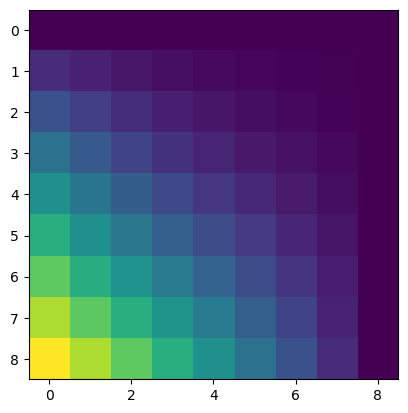

In [75]:
import numpy as np
import matplotlib.pyplot as plt
size = 9
times = 10
arr_center = np.full((size-2,size-2), 0.5)
arr_upper = np.zeros((1,size-2), dtype='int')
arr_right = np.zeros((size-1,1), dtype='int')
arr_lower = np.linspace(100,0,size).reshape(1, size)
arr_left= np.linspace(0,100,size)
arr = np.concatenate([arr_upper,arr_center])
arr = np.concatenate([arr,arr_right],axis=1)
arr = np.concatenate([arr_left[:-1].reshape(size-1, 1),arr],axis=1)
arr = np.concatenate([arr,arr_lower])
plt.imshow(arr)
arr_new = arr.copy()

for t in range (times):
    for i in range (size):
        for j in range (size):
            if i > 0 and j > 0 and i < size-1 and j < size-1:
                arr_new[i][j] = 0.25*(arr[i-1][j] + arr[i][j-1] + arr[i+1][j]+ arr[i][j+1])
    arr = arr_new
    plt.imshow(arr)
print (arr)    



### **Exercise5:**
Implement [Conway's game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy array to hold data and animation technique from the previous exercise (or any other if you know it).

### **Exercise6 (for those from data science following statistics course):**

Choose some howework from the statistics course that you've done in R and try to rewrite it using numpy.